In [ ]:
# project 1 on :  stock price Analysis

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 11.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
#import data 
import yfinance as yf
df=yf.download('VOD.L',start ='2016-01-01',end='2022-02-10')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,219.500000,220.074005,215.375000,216.000000,140.577545,73377483
2016-01-05,220.000000,221.399994,216.000000,219.699997,142.985596,54065200
2016-01-06,219.750000,220.750000,218.050003,219.149994,142.627655,56716589
2016-01-07,215.050003,219.199997,214.500000,218.199997,142.009354,95420191
2016-01-08,219.949997,225.750000,218.149994,223.050003,145.165833,90441040
...,...,...,...,...,...,...
2022-02-03,130.039993,134.259995,129.923996,133.580002,128.976624,169317332
2022-02-04,135.000000,135.919998,134.220001,134.220001,129.594559,107823624
2022-02-07,134.520004,138.139999,134.298996,137.399994,132.664963,430042188


In [ ]:
# to get an idea of number of rows and columns 
df.shape

(1545, 6)

In [ ]:
import matplotlib.pyplot as plt

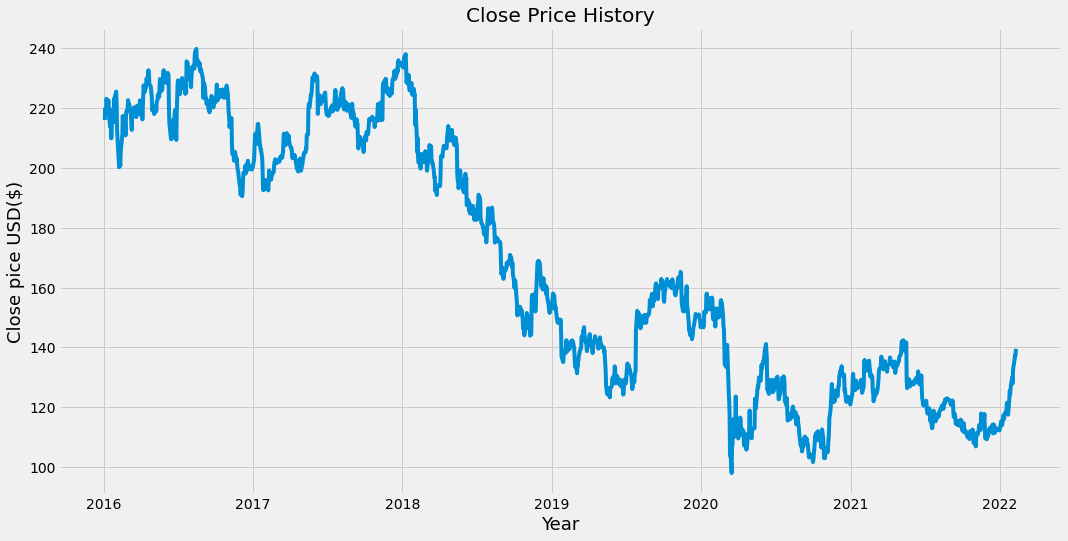

In [ ]:
#visualise the closing price history
plt.figure(figsize=(16,8)) 
# 16X8 is size of figure
#for title:
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Year',fontsize=18)
plt.ylabel('Close pice USD($)',fontsize=18)
plt.show()

In [ ]:
import math
#create a dataframe with only the close column
data=df.filter(['Close'])
#convert the dataframe to a numpy array
dataset=data.values
#get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
#math.ceil used to round off the number
training_data_len



1236

In [ ]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data


array([[0.83272165],
       [0.85883682],
       [0.85495481],
       ...,
       [0.27795029],
       [0.27667987],
       [0.29305475]])

In [ ]:
#create the training dataset
#create the scaled training data set
train_data=scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train=[]
y_train=[]
for i in range(60  ,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.83272165, 0.85883682, 0.85495481, 0.84824958, 0.88248169,
       0.86660083, 0.87012991, 0.87859968, 0.8623659 , 0.83448619,
       0.81472332, 0.8383682 , 0.78931401, 0.81684079, 0.85707228,
       0.85036705, 0.85142573, 0.88354037, 0.82778096, 0.88848106,
       0.89942123, 0.87189445, 0.81084131, 0.79213723, 0.76919822,
       0.72120271, 0.72790794, 0.73461328, 0.72402604, 0.75825805,
       0.78649068, 0.79743085, 0.84189728, 0.8295455 , 0.81119424,
       0.83025125, 0.81789947, 0.79637217, 0.84683797, 0.85283744,
       0.85883682, 0.87930554, 0.87295313, 0.86977698, 0.86977698,
       0.84895544, 0.84436757, 0.82848671, 0.80907677, 0.84225021,
       0.85813106, 0.86024843, 0.86271882, 0.85883682, 0.84225021,
       0.83942688, 0.84789665, 0.8662479 , 0.84930837, 0.84577929])]
[0.8785996830096432]

[array([0.83272165, 0.85883682, 0.85495481, 0.84824958, 0.88248169,
       0.86660083, 0.87012991, 0.87859968, 0.8623659 , 0.83448619,
       0.81472332, 0.8383682 , 0.789

In [ ]:
# to convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1176, 60, 1)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models

In [ ]:
#build the LSTM model
models=keras.Sequential()
models.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
models.add(LSTM(50,return_sequences=False))

models.add(Dense(25))
models.add(Dense(1))


In [ ]:
#compile the model
models.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#train the model
models.fit(x_train,y_train,batch_size=1,epochs=1)

1176/1176 [==============================] - 53s 42ms/step - loss: 0.0035


In [ ]:
#create the testing data set
#create a new array containing scaled values from index 1156 to 2003
test_data=scaled_data[training_data_len-60:,:]
# create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [ ]:
#convert the data to a numpy array
x_test=np.array(x_test)

In [ ]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#get the models predicted price values
predictions=models.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

8.561641878294713

In [ ]:
!pip install validators

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for validators: filename=validators-0.19.0-py3-none-any.whl size=19553 sha256=974ea491ede3dd03f0f1360b37c77585df4075b270bfbdee10f0402f88f3e156
  Stored in directory: /root/.cache/pip/wheels/fe/5d/69/ff53a908b9f14fb7730a58fdede0fac4cdc99ef3624ec76d05
Successfully built validators


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'Upper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


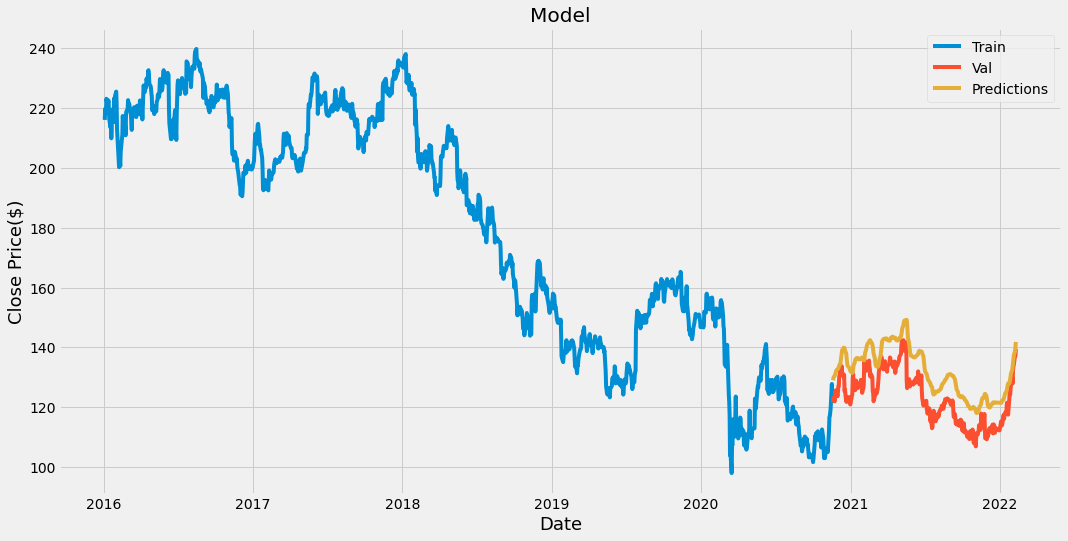

In [ ]:
#plot the data
import validators
train=data[:training_data_len]
validators=data[training_data_len:]
validators['Predictions']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(validators[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='Upper right')
plt.show()

In [ ]:
#show the valid and predicted prices
validators

,Close,Predictions
Date,,
2020-11-19,121.660004,129.014236
2020-11-20,123.180000,129.924133
2020-11-23,121.980003,130.594498
2020-11-24,125.320000,130.911163
2020-11-25,124.360001,131.425018
...,...,...
2022-02-03,133.580002,136.013489
2022-02-04,134.220001,137.414124
2022-02-07,137.399994,138.782593


In [ ]:
#get the quote
apple_quote=yf.download('AAPL', start = '2015-01-01', end='2022-01-15')
#create a new dataframe
new_df=apple_quote.filter(['Close'])
#get the last 60 day closing price  values and convert the dataframe to an array
# last_60_days=new_df[-60:].values
last_60_days=new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#create a empty list
x_test=[]
#append the past 60 days
x_test.append(last_60_days_scaled)
#convert the x_test data set to a numpy array
x_test=np.array(x_test)
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#get the predicted scaled price
pred_price=models.predict(x_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[183.2928]]


In [ ]:
# data of another stock
s=yf.download('TSLA', start = '2022-01-14', end='2022-02-20')
print(s['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2022-01-14    1049.609985
2022-01-18    1030.510010
2022-01-19     995.650024
2022-01-20     996.270020
2022-01-21     943.900024
2022-01-24     930.000000
2022-01-25     918.400024
2022-01-26     937.409973
2022-01-27     829.099976
2022-01-28     846.349976
2022-01-31     936.719971
2022-02-01     931.250000
2022-02-02     905.659973
2022-02-03     891.140015
2022-02-04     923.320007
2022-02-07     907.340027
2022-02-08     922.000000
2022-02-09     932.000000
2022-02-10     904.549988
2022-02-11     860.000000
2022-02-14     875.760010
2022-02-15     922.429993
2022-02-16     923.390015
2022-02-17     876.349976
2022-02-18     856.979980
Name: Close, dtype: float64


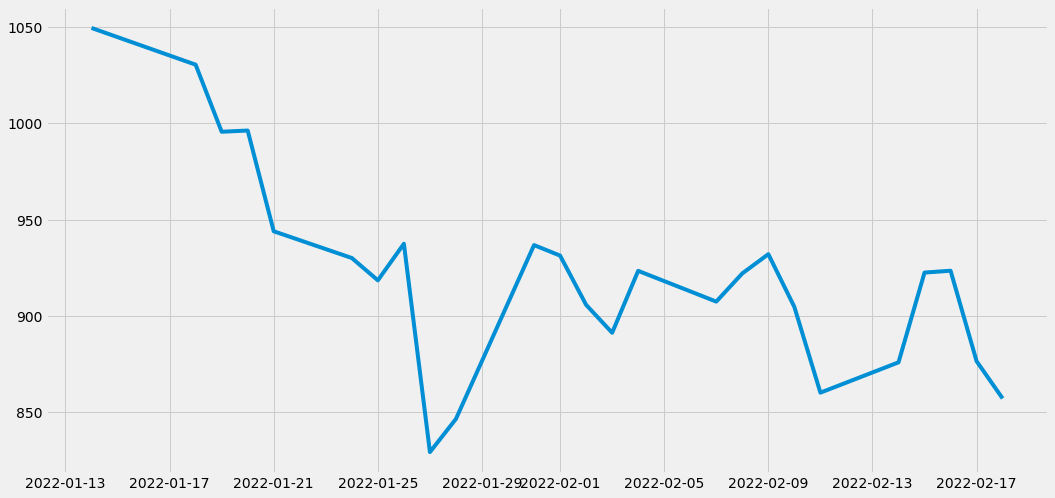

In [ ]:

plt.figure(figsize=(16,8)) 
plt.plot(s['Close'])
# #visualise the closing price history
# plt.figure(figsize=(16,8)) 
# # 16X8 is size of figure
# #for title:
# plt.title("Close Price History")
# plt.plot(df['Close'])
# plt.xlabel('Year',fontsize=18)
# plt.ylabel('Close pice USD($)',fontsize=18)
# plt.show()